feautures are::

     Age  Protein1  Protein2  Protein3  Protein4  modified Tumour_Stage  \
0     42  0.952560   2.15000  0.007972 -0.048340                      2   
1     54  0.000000   1.38020 -0.498030 -0.507320                      2   
2     63 -0.523030   1.76400 -0.370190  0.010815                      2   
3     78 -0.876180   0.12943 -0.370380  0.132190                      1   
4     42  0.226110   1.74910 -0.543970 -0.390210                      2   
..   ...       ...       ...       ...       ...                    ...   
329   59  0.024598   1.40050  0.024751  0.280320                      2   
330   41  0.100120  -0.46547  0.472370 -0.523870                      1   
331   54  0.753820   1.64250 -0.332850  0.857860                      2   
332   74  0.972510   1.42680 -0.366570 -0.107820                      2   
333   66  0.286380   1.39980  0.318830  0.836050                      2   

     modified_HER2 status  
0                       0  
1                       0 

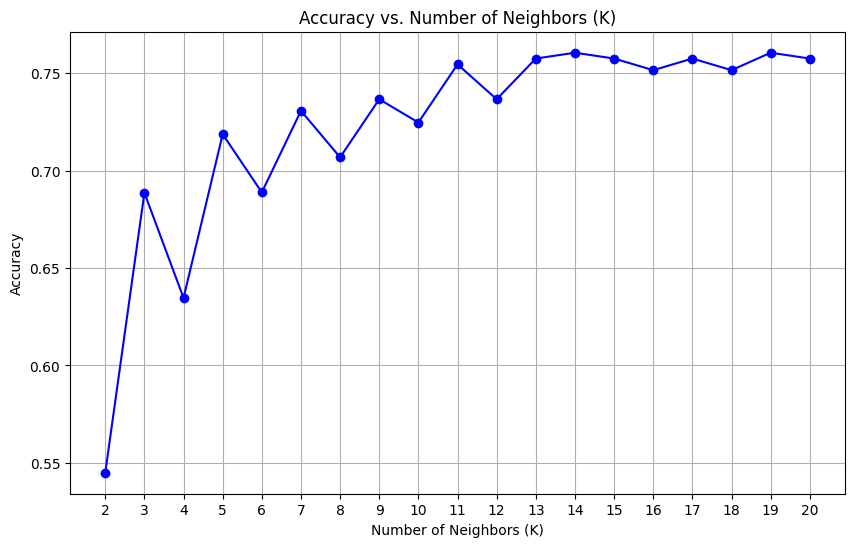

The Maximum Accuracy is at k=14 and 19


In [9]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
a=pd.read_csv('/content/breast_cancer_survival.csv')
b = ["Gender", "Histology", "ER status", "PR status", "Surgery_type", "Date_of_Surgery", "Date_of_Last_Visit"]
c = a.drop(columns=b)

def map_tumour_stage(stage):
    if stage == 'I':
        return 1
    elif stage == 'II':
        return 2
    else:
        return 3

c['modified Tumour_Stage'] = c['Tumour_Stage'].apply(map_tumour_stage)
c["mod_Patient_Status"]=[1 if x =="Alive" else 0 for x in c["Patient_Status"]]

d = c.drop(columns=['Tumour_Stage','Patient_Status'],axis=1)
d["modified_HER2 status"]= [1 if x =="Positive" else 0 for x in d['HER2 status']]
x=d.drop(["HER2 status","mod_Patient_Status"],axis=1)
print("feautures are::\n")
print(x)
y=d["mod_Patient_Status"]
print("\ntarget variable is::\n")
print(y)
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

accuracy_scores = []

k_values = list(range(2, 21))

for k in k_values:

    knn_classifier = KNeighborsClassifier(n_neighbors=k)

    scores = cross_val_score(knn_classifier, x, y, cv=5, scoring='accuracy')
    mean_accuracy = scores.mean()

    accuracy_scores.append(mean_accuracy)

for k, accuracy in zip(k_values, accuracy_scores):
    print(f'k={k}, Accuracy={accuracy:.4f}')
    import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

accuracy_scores = []

k_values = list(range(2, 21))

for k in k_values:
    knn_classifier = KNeighborsClassifier(n_neighbors=k)

    scores = cross_val_score(knn_classifier, x, y, cv=5, scoring='accuracy')
    mean_accuracy = scores.mean()

    accuracy_scores.append(mean_accuracy)

plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracy_scores, marker='o', linestyle='-', color='b')
plt.title('Accuracy vs. Number of Neighbors (K)')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.xticks(np.arange(2, 21, step=1))
plt.grid(True)
plt.show()
print("The Maximum Accuracy is at k=14 and 19")

[0.6873699999999987, 0.42817999999999684, 0.40891333333333035, 0.4132631249999964, 0.3605523999999932, 0.3382547222222205, 0.30678551020407896, 0.30559687500000327, 0.29971555555556073, 0.2720627000000044, 0.2350177685950444, 0.2167721527777811, 0.19979568047337684, 0.1972114795918392, 0.17855764444444996, 0.18484894531250137, 0.18854508650518995, 0.18573385802468712, 0.20028894736841832, 0.1978684249999957]


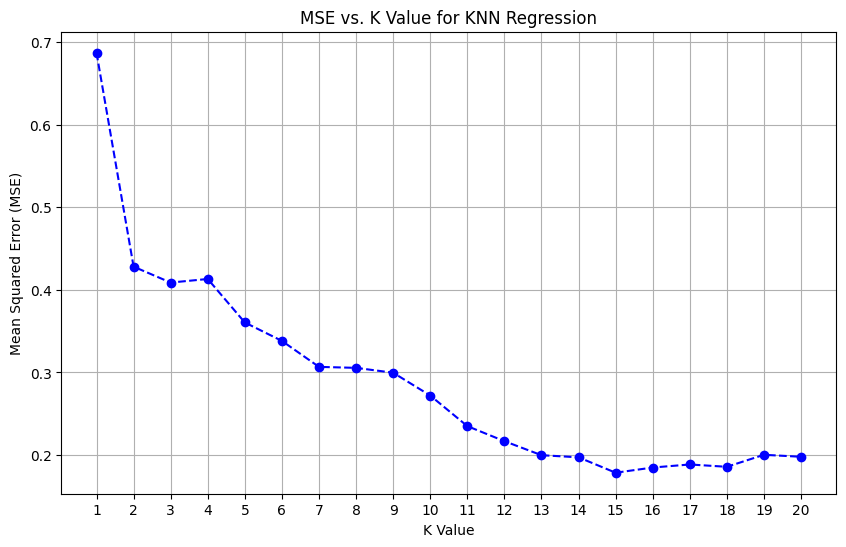

The Minimum Error is at K==15


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

data = pd.read_csv('/content/Japan_life_expectancy (1).csv')


X = data.drop(columns=['Prefecture'])
y = data['Life_expectancy']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


k_values = list(range(1, 21))
mse_values = []


for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_values.append(mse)
print(mse_values)

plt.figure(figsize=(10, 6))
plt.plot(k_values, mse_values, marker='o', linestyle='--', color='b')
plt.title('MSE vs. K Value for KNN Regression')
plt.xlabel('K Value')
plt.ylabel('Mean Squared Error (MSE)')
plt.xticks(k_values)
plt.grid(True)
plt.show()

print("The Minimum Error is at K==15")